In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import create_dataloaders, plot_tsne
import VariationalAutoDecoder as VAD
import importlib

In [78]:
# Reload modules to ensure we have the latest versions
importlib.reload(VAD)

<module 'VariationalAutoDecoder' from '/home/nativ/Deep_learning_technion/Project - Autodecoder/VariationalAutoDecoder.py'>

In [79]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 42
torch.manual_seed(seed)

In [80]:
# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset", batch_size=32)

In [81]:
# Initialize model
latent_dim = 128
output_shape = (1, 28, 28)
vad = VAD.VariationalAutoDecoder(latent_dim, output_shape).to(device)

In [82]:
# Initialize distribution parameters
num_samples = len(train_ds)
distribution = 'gaussian'  # or 'poisson' or 'uniform'

if distribution == 'gaussian':
    mu = torch.randn(num_samples, latent_dim, requires_grad=True, device=device)
    log_var = torch.zeros(num_samples, latent_dim, requires_grad=True, device=device)
    dist_params = [mu, log_var]
elif distribution == 'poisson':
    rate = torch.ones(num_samples, latent_dim, requires_grad=True, device=device)
    dist_params = [rate]
elif distribution == 'uniform':
    low = torch.zeros(num_samples, latent_dim, requires_grad=True, device=device)
    high = torch.ones(num_samples, latent_dim, requires_grad=True, device=device)
    dist_params = [low, high]

# Initialize optimizer
optimizer = optim.Adam(list(vad.parameters()) + dist_params, lr=1e-2)

In [83]:
print(dist_params)

[tensor([[ 0.1940,  2.1614, -0.1721,  ..., -1.2072, -0.2438, -0.6784],
        [ 0.1973,  0.9782, -0.0287,  ..., -0.9226,  0.7893, -1.8010],
        [-1.9351,  1.1007,  0.0251,  ..., -0.6872, -0.0919, -0.7132],
        ...,
        [-2.6023,  0.7094, -0.6053,  ..., -2.1702, -0.0633,  1.0113],
        [-0.4153,  1.5027,  1.0650,  ..., -1.1936,  1.5837,  2.0321],
        [ 0.8565, -1.1526,  1.7922,  ..., -0.4203, -0.0364, -1.3576]],
       device='cuda:0', requires_grad=True), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', requires_grad=True)]


In [84]:
importlib.reload(VAD)

<module 'VariationalAutoDecoder' from '/home/nativ/Deep_learning_technion/Project - Autodecoder/VariationalAutoDecoder.py'>

In [85]:
# Train the model
train_losses = VAD.train_variational_auto_decoder(vad, train_dl, optimizer, dist_params, device, distribution, epochs=50, beta=1)

Epoch [1/50], Train Loss: 17959.1566
Epoch [2/50], Train Loss: 8328.2779
Epoch [3/50], Train Loss: 7544.2451
Epoch [4/50], Train Loss: 6914.5284
Epoch [5/50], Train Loss: 5835.9202
Epoch [6/50], Train Loss: 4884.2627
Epoch [7/50], Train Loss: 4362.9897
Epoch [8/50], Train Loss: 4039.2563
Epoch [9/50], Train Loss: 3714.7282
Epoch [10/50], Train Loss: 3494.9683
Epoch [11/50], Train Loss: 3310.8534
Epoch [12/50], Train Loss: 3160.5929
Epoch [13/50], Train Loss: 2975.3782
Epoch [14/50], Train Loss: 2883.6764
Epoch [15/50], Train Loss: 2767.5536
Epoch [16/50], Train Loss: 2632.5161
Epoch [17/50], Train Loss: 2502.8159
Epoch [18/50], Train Loss: 2405.9450
Epoch [19/50], Train Loss: 2327.3768
Epoch [20/50], Train Loss: 2226.6779
Epoch [21/50], Train Loss: 2148.6880
Epoch [22/50], Train Loss: 2056.4725
Epoch [23/50], Train Loss: 2041.8621
Epoch [24/50], Train Loss: 1970.2321
Epoch [25/50], Train Loss: 1894.5787
Epoch [26/50], Train Loss: 1820.0195
Epoch [27/50], Train Loss: 1744.2488
Epoch [28

In [86]:
print(dist_params)

[tensor([[-0.3186,  2.4450, -0.3838,  ..., -1.5830, -1.0861, -1.1210],
        [-0.0845,  0.1995,  0.5712,  ..., -0.6152,  0.1344, -1.2927],
        [-3.0005,  1.6576, -0.7969,  ..., -1.0688,  0.7747, -1.0007],
        ...,
        [-3.2677,  1.1422, -1.1545,  ..., -2.5884,  0.0240,  1.0942],
        [ 0.3010,  1.5848,  1.8222,  ..., -0.4327,  1.4700,  2.1752],
        [ 1.2762, -0.9983,  1.8976,  ..., -0.4516, -0.2363, -1.5660]],
       device='cuda:0', requires_grad=True), tensor([[-0.7144,  0.2090, -0.4595,  ..., -0.5235, -0.2715, -0.1745],
        [-0.5951, -0.2907, -0.5649,  ..., -0.1546, -0.3465,  0.0889],
        [-0.6053,  0.1790, -0.1281,  ..., -0.0362, -0.6049, -0.0818],
        ...,
        [-0.1609, -0.2344, -0.0860,  ..., -0.4287, -1.3198, -0.3831],
        [-0.1756, -0.4525, -0.7637,  ...,  0.0860, -0.5351, -0.2038],
        [-0.2714, -0.1775, -0.3708,  ...,  0.0852, -0.3939, -0.5150]],
       device='cuda:0', requires_grad=True)]


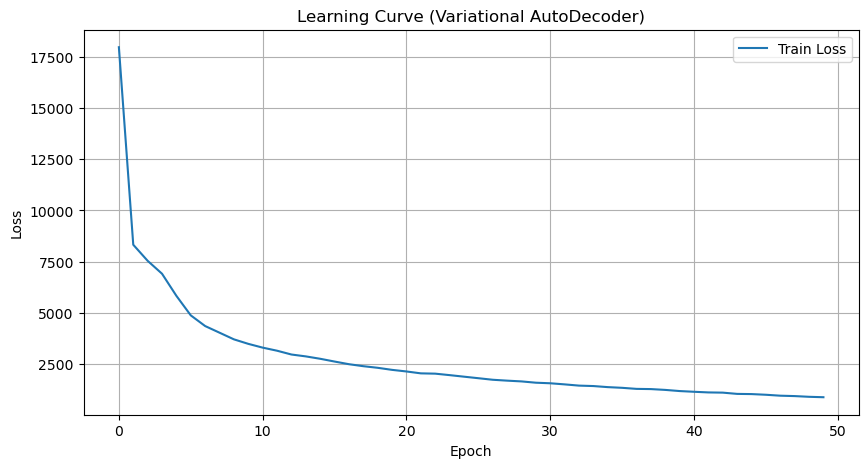

In [87]:
# Plot learning curve
VAD.plot_learning_curve(train_losses)

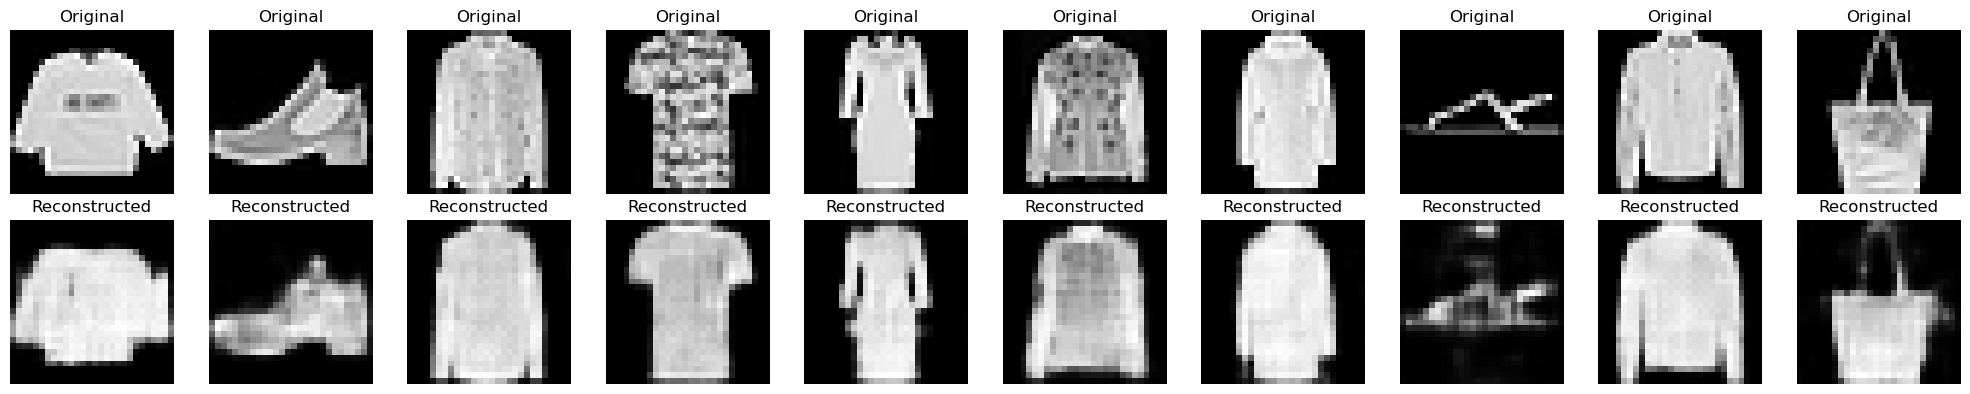

In [88]:
VAD.visualize_vad_reconstructions(vad, train_dl, dist_params, device, distribution='gaussian', num_samples=10)

In [89]:
train_latents = VAD.reparameterize(distribution, *dist_params)
plot_tsne(train_ds, train_latents, "part2_train_tsne.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [25]:
# Visualize reconstructions
VAD.visualize_reconstructions(vad, test_dl, device, num_samples=5)

TypeError: visualize_reconstructions() missing 1 required positional argument: 'device'

In [ ]:
# Generate random latents and visualize
random_latents = torch.randn(5, latent_dim, device=device)

In [ ]:
VAD.visualize_from_latents(vad, random_latents, device, num_samples=5)

In [ ]:
# Evaluate the mode
from evaluate import evaluate_model

# For VAE, we don't need separate latent variables for evaluation
# The model generates latents internally

In [6]:
# Define model parameters
latent_dim = 128  # Dimension of latent space
output_shape = (1, 28, 28)  # Output shape for Fashion MNIST images
distribution = 'gaussian'  # You can change this to 'poisson' or 'uniform'

# Initialize model
vae = VAD.VariationalAutoDecoder(latent_dim, output_shape, distribution).to(device)

In [7]:
# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset", batch_size=32)

# Initialize optimizer
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Train the model
train_losses = VAD.train_variational_auto_decoder(vae, train_dl, optimizer, device, epochs=50, beta=1.0)

Epoch [1/50], Train Loss: 20592.4524
Epoch [2/50], Train Loss: 20034.5320
Epoch [3/50], Train Loss: 18895.7103
Epoch [4/50], Train Loss: 18452.9247
Epoch [5/50], Train Loss: 18409.9972
Epoch [6/50], Train Loss: 18398.4514
Epoch [7/50], Train Loss: 18368.7087
Epoch [8/50], Train Loss: 13347.8004
Epoch [9/50], Train Loss: 8147.1977
Epoch [10/50], Train Loss: 6744.1170
Epoch [11/50], Train Loss: 6092.3750
Epoch [12/50], Train Loss: 5835.3698
Epoch [13/50], Train Loss: 5827.5611
Epoch [14/50], Train Loss: 5811.1662
Epoch [15/50], Train Loss: 5807.3892
Epoch [16/50], Train Loss: 5793.1405
Epoch [17/50], Train Loss: 5799.0232
Epoch [18/50], Train Loss: 5786.4672
Epoch [19/50], Train Loss: 5802.0728
Epoch [20/50], Train Loss: 5798.0595
Epoch [21/50], Train Loss: 5791.1977
Epoch [22/50], Train Loss: 5787.4341
Epoch [23/50], Train Loss: 5784.8717
Epoch [24/50], Train Loss: 5786.0885
Epoch [25/50], Train Loss: 5792.0636
Epoch [26/50], Train Loss: 5785.1428
Epoch [27/50], Train Loss: 5789.3158
Ep

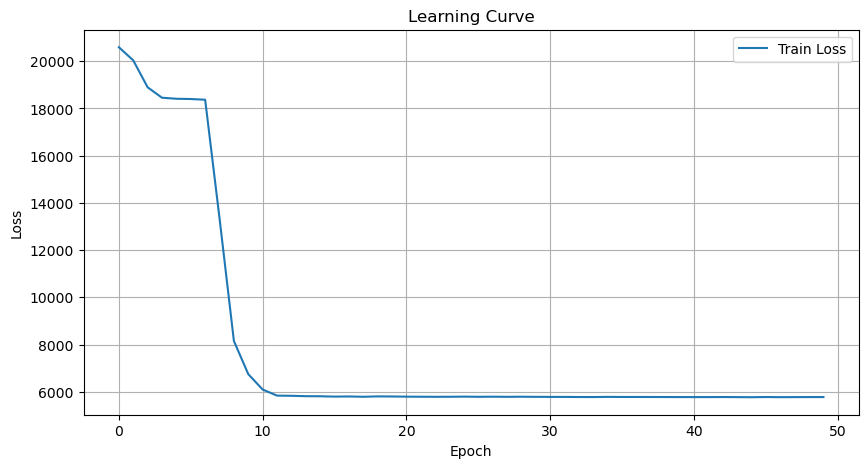

In [10]:
# Plot learning curve
VAD.plot_learning_curve(train_losses)

In [16]:
# Visualize reconstructions
VAD.visualize_reconstructions(vae, test_dl, device, num_samples=5)

TypeError: visualize_reconstructions() missing 1 required positional argument: 'device'

In [ ]:
# Generate random latents and visualize
random_latents = torch.randn(5, latent_dim, device=device)
VAD.visualize_from_latents(vae, random_latents, device, num_samples=5)

In [ ]:
# Evaluate the model
from evaluate import evaluate_model

# For VAE, we don't need separate latent variables for evaluation
# The model generates latents internally
test_loss = evaluate_model(vae, test_dl, optimizer, None, epochs=10, device=device)
print(f"Test Loss: {test_loss:.4f}")


In [ ]:
# Generate latent representations for t-SNE visualization
vae.eval()
with torch.no_grad():
    latents = []
    for _, x in test_dl:
        x = x.to(device).float()
        batch_size = x.size(0)
        z = vae.reparameterize(batch_size)
        latents.append(z)
    latents = torch.cat(latents, dim=0)

# Plot t-SNE
plot_tsne(test_ds, latents, "vae_tsne.png", plot_title="t-SNE Plot (VAE)")

imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import create_dataloaders
from utils import plot_tsne
import AutoDecoder as AD

In [2]:
import importlib

In [60]:
import utils as utils
importlib.reload(AD)
importlib.reload(utils)


NameError: name 'AD' is not defined

In [4]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 42
torch.manual_seed(seed)
# Define model parameters
latent_dim = 128  # Dimension of latent space
output_shape = (1, 28, 28)  # Output shape for Fashion MNIST images

# Initialize model
auto_decoder = AD.AutoDecoder(latent_dim, output_shape).to(device)


In [5]:
# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset", batch_size=32)

Gaussian distribution

In [ ]:
# train
train_mu = torch.randn(len(train_ds), latent_dim,requires_grad=True, device=device)
train_sigma = torch.randn(len(train_ds), latent_dim,requires_grad=True, device=device)
# test
test_mu = torch.randn(len(test_ds), latent_dim, device=device)
test_sigma = torch.randn(len(test_ds), latent_dim, device=device)


In [6]:
# Initialize latent vectors
train_latents = torch.randn(len(train_ds), latent_dim, requires_grad=True, device=device)
test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=True, device=device)


In [7]:
plot_tsne(train_ds, train_latents, "part1_train_tsne_before.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [8]:

plot_tsne(test_ds, test_latents, "part1_test_tsne_before.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [9]:
# # Split train_ds into train and validation sets
# from torch.utils.data import random_split
# val_size = len(train_ds) // 5  # 20% for validation
# train_size = len(train_ds) - val_size
# train_subset, val_subset = random_split(train_ds, [train_size, val_size])

# train_dl = torch.utils.data.DataLoader(train_subset, batch_size=16, shuffle=True)
# val_dl = torch.utils.data.DataLoader(val_subset, batch_size=16, shuffle=False)
# # Initialize latent vectors
# train_latents = torch.randn(len(train_subset), latent_dim, requires_grad=True, device=device)
# val_latents = torch.randn(len(val_subset), latent_dim, requires_grad=False, device=device)
# test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=False, device=device)

In [10]:
# Initialize optimizer
optimizer = optim.Adam(list(auto_decoder.parameters()) + [train_latents], lr=1e-3)

In [11]:
auto_decoder.load_state_dict(torch.load('auto_decoder_parameters.pth'))
# train_losses = AD.train_auto_decoder(auto_decoder, train_dl, optimizer, train_latents, device, epochs=100)
# # save auto_decoder parameters
# torch.save(auto_decoder.state_dict(), 'auto_decoder_parameters.pth')

/tmp/ipykernel_691094/3295879157.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  auto_decoder.load_state_dict(torch.load('auto_decoder_parameters.pth'))


<All keys matched successfully>

In [12]:
#AD.plot_learning_curve(train_losses)

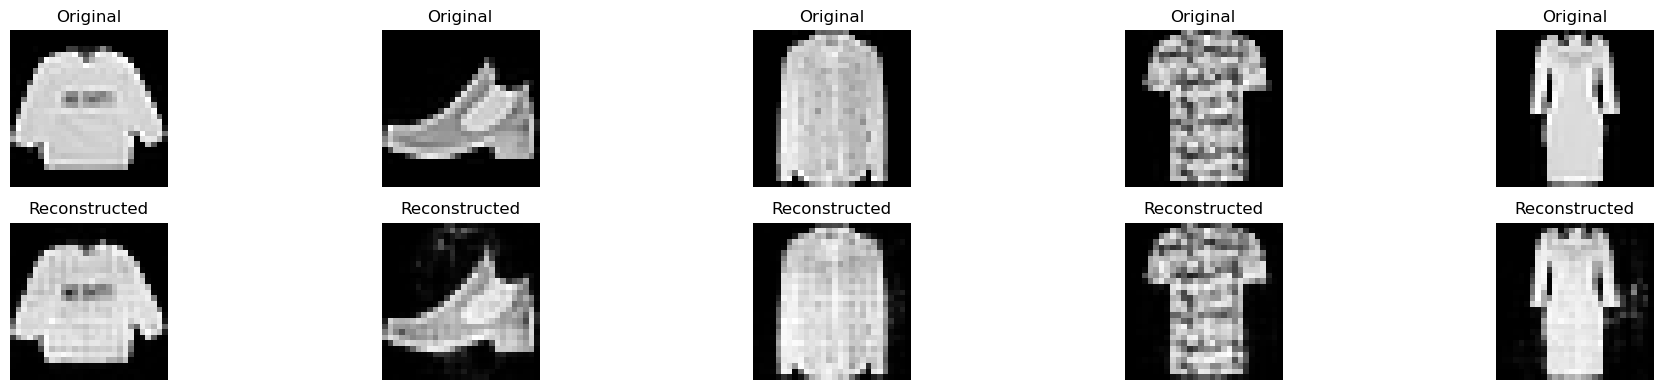

In [13]:
AD.visualize_reconstructions(auto_decoder, train_dl, train_latents, device, num_samples=5)

In [14]:
plot_tsne(train_ds, train_latents, "part1_train_tsne.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

In [15]:
test_latents_optimizer = optim.Adam([test_latents], lr=1e-2)

In [16]:
from evaluate import evaluate_model

evaluate_model(auto_decoder, test_dl, test_latents_optimizer, test_latents, epochs=100, device=device)

0.15415832307189703

In [17]:
plot_tsne(test_ds, test_latents, "part1_test_tsne.png", plot_title="t-SNE Plot")

<Figure size 800x600 with 0 Axes>

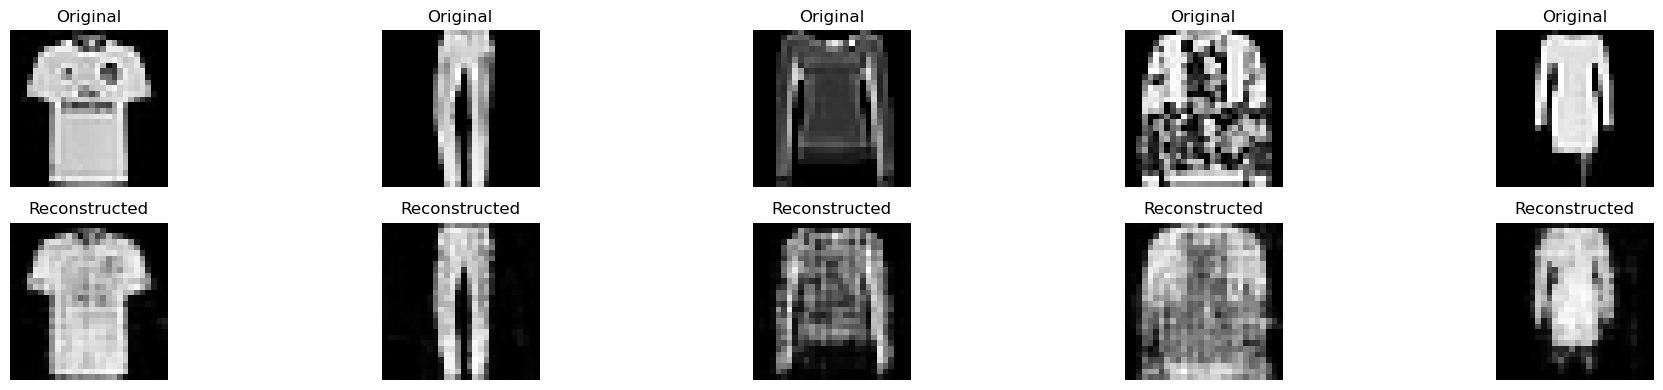

In [18]:
AD.visualize_reconstructions(auto_decoder, test_dl, test_latents, device,num_samples=5)

In [19]:
random_latents = torch.randn(5, latent_dim, requires_grad=False, device=device)

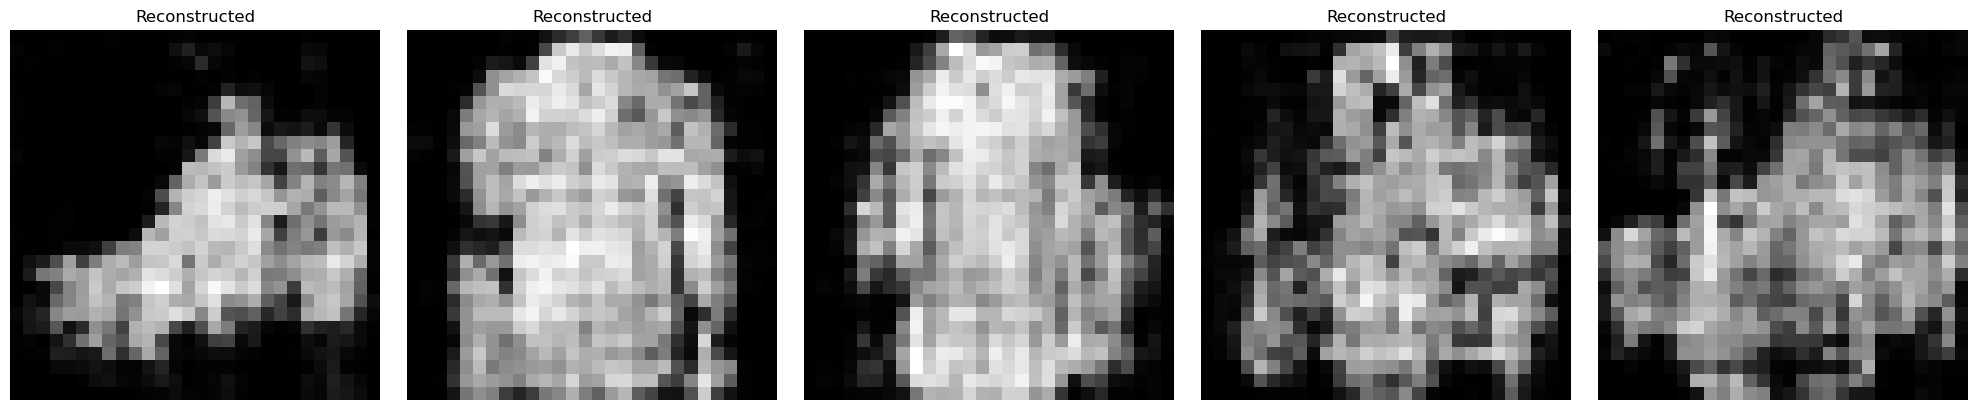

In [20]:
AD.visualize_from_latents(auto_decoder, random_latents, device,num_samples=5)
